In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
import pna_designer
import pandas as pd

%load_ext rpy2.ipython

In [2]:
database_location = "data/database"
silva = pna_designer.silva_manager(database_location)

taxpaths = silva.find_taxpath('Fungi')
print(taxpaths)
Fungi=taxpaths[0]

Total search results: 1

	Name:       Fungi
	Taxpath:  Eukaryota;Opisthokonta;Nucletmycea;Fungi;
	Taxonomic rank:      kingdom
	Number of sequence entries:      29123
['Eukaryota;Opisthokonta;Nucletmycea;Fungi;']


In [3]:
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
Medicago_sativa = 'GAFF01033989.4391.6188'

designer_gPNA = pna_designer.PNA_Designer(result_file='data/gPNA.csv',target_silva_accession=Medicago_sativa,
                             sequence_silva_path=Fungi,
                             primer_F=F,primer_R=R,kmer_range=(9,13),database_dir='data/database')

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [4]:
gPNA = pd.read_csv('data/gPNA.csv')
Msativa_seq = designer_gPNA.target
gPNA_target = "CGGCCGCTACGC"
print(Msativa_seq)
Msativa_seq = Msativa_seq[1]
gPNA['pna_map'] = pna_designer.map_PNA(Msativa_seq,gPNA_target)

('GAFF01033989.4391.6188', 'GTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGGTTGGGTCGATCGGTCCGCCTATGGTGTGCACCGGTTGGCTCGTCCCTTCTGCCGGCGATGCGCTCCTGGCCTTAATTGGCCGGGTCGTGCCTCCGGCGCTGTTACTTTGAAGAAATTAGAGTGCTCAAAGCAAGCCTACGCTCTGGATACATTAGCATGGGATAACACCACAGGATTCTGATCCTATTGTGTTGGCCTTCGGGATCGGAGTAATGATTAACAGGGACAGTCGGGGGCATTCGTATTTCATAGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACAACTGCGAAAGCATTTGCCAAGGATGTTTTCATTAATCAAGAACGAAAGTTGGGGGCTCGAAGACGATCAGATACCGTCCTAGTCTCAACCATAAACGATGCCGACCAGGGATCAGCGGATGTTGCTTTTAGGACTCCGCTGGCACCTTATGAGAAATCAAAGTCTTTGGGTTCCGGGGGGAGTATGGTCGCAAGGCTGAAACTTAAAGGAATTGACGGA')


/home/spiridon/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/

  warnings.warn(x, RRuntimeWarning)


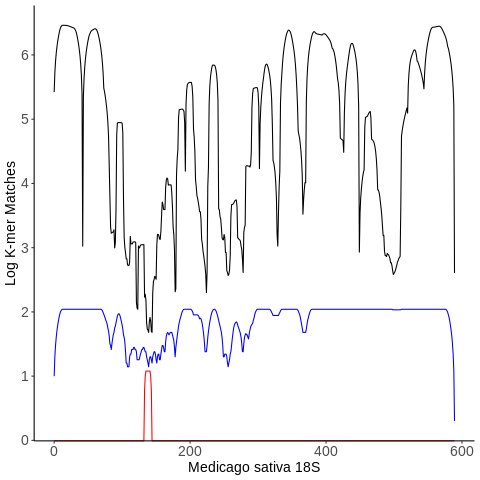

In [5]:
%%R -i gPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(gPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Medicago sativa 18S")
print(plt)
ggsave('figures/gPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


# mPNA and pPNA

In [6]:
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R806 = "GGACTACHVGGGTWTCTAAT"
designer_pPNA = pna_designer.PNA_Designer(result_file='data/pPNA.csv',
                                          target_fastafile="data/A_thaliana_chloroplast.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R806,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [7]:
pPNA = pd.read_csv('data/pPNA.csv')
thaliana_chloroplast_seq = designer_pPNA.target
pPNA_target = "GGCTCAACCCTGGACAG"
print(thaliana_chloroplast_seq)
thaliana_chloroplast_seq = thaliana_chloroplast_seq[1]
pPNA['pna_map'] = pna_designer.map_PNA(thaliana_chloroplast_seq,pPNA_target)

('>AP000423.1 Arabidopsis_thaliana_chloroplast', 'GTGCCAGCAGCCGCGGTAATACAGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGCTTTTTAAGTCCGCCGTCAAATCCCAGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTTGAGTACGGTAGGGGCAGAGGGAATTTCCGGTGGAGCGGTGAAATGCGTAGAGATCGGAAAGAACACCAACGGCGAAAGCACTCTGCTGGGCCGACACTGACACTGAGAGACGAAAGCTAGGGGAGCGAATGGGATTAGATACCCCAGTAGTCCT')


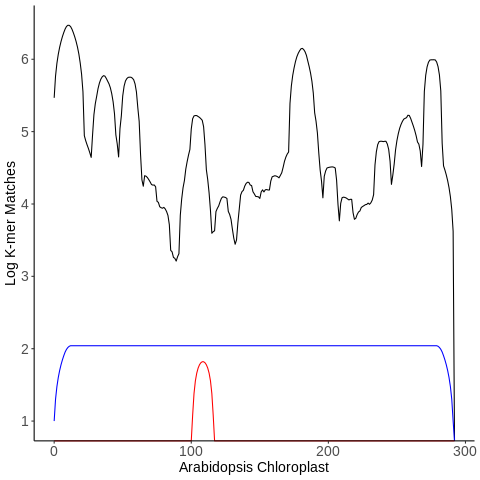

In [8]:
%%R -i pPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(pPNA,aes(x=index,y=absolute.match))+
    geom_line(color='black')+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Chloroplast")

print(plt)
ggsave('figures/pPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


In [9]:
#http://greengenes.lbl.gov/Download/Sequence_Data/Fasta_data_files/Caporaso_Reference_OTUs/gg_otus_4feb2011.tgz
#Then you must decompress
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R806 = "GGACTACHVGGGTWTCTAAT"
designer_mPNA = pna_designer.PNA_Designer(result_file='data/mPNA.csv',
                                          target_fastafile="data/A_thaliana_mitochondria.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R806,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [10]:
mPNA = pd.read_csv('data/mPNA.csv')
thaliana_mitochondria_seq = designer_mPNA.target
mPNA_target = "GGCAAGTGTTCTTCGGA"
print(thaliana_mitochondria_seq)
thaliana_mitochondria_seq = thaliana_mitochondria_seq[1]
mPNA['pna_map'] = pna_designer.map_PNA(thaliana_mitochondria_seq,mPNA_target)

('>JF729201.1 Arabidopsis_thaliana_mitochondria', 'GTGCCAGCAGCCGCGGTAATACGGGGGGGGCAAGTGTTCTTCGGAATGACTGGGCGTAAAGGGCACGTAGGCGGTGAATCGGGTTGAAAGTGAAAGTCGCCAAAAAGTGGCGGAATGCTTTCGAAACCAATTCACTTGAGTGAGACAGAGGAGAGTGGAATTTCGTGTGGAGGGGTGAAATCTACAGATCTACGAAGGAACGCCAAAAGCGAAGGCAGCTCTCTGGGTCCCTACCGACGCTGGGGGTGCGAAAGCATGGGGGAGCGAACGGGATTAGATACCCTGGTAGTCCA')


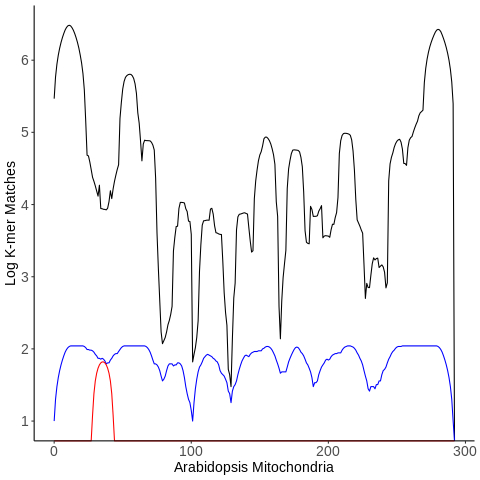

In [11]:
%%R -i mPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(mPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Mitochondria")

print(plt)        
        
ggsave('figures/mPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


# Justifying the orientation of the PNA

In [12]:
gPNA = "CGGCCGCTACGC"

gPNA_alternate = "GCCGGCGATGCG"

accessions = silva.get_accessions(Fungi)
fungi_seqs=silva.get_seqs(accessions)

In [27]:
def kmerize(DNA,krng,rc=True):
    seq_kmers=set()
    for i in range(0,len(DNA)):
        for k in krng:
            if i+k<len(DNA):
                seq_kmers.add(DNA[i:i+k])
                if rc:
                    seq_kmers.add(pna_designer.InSilico_PCR.reverse_complement(DNA[i:i+k]))
    return(seq_kmers)
            

def Enumerate_Kmers(target_seq,sequences,krng=(8,12)):
    print("Enumerating {} for k-mer range {}-{} in {} sequences".format(target_seq,krng[0],krng[1],str(len(sequences))))
    krng = list((range(krng[0],krng[1]+1)))
    targ_k = kmerize(target_seq,krng,rc=False)
    #must account for reverse
    targ_k.union(kmerize(target_seq[::-1],krng,rc=False))
    knum=[]
    tot=len(sequences)
    for i,sequence in enumerate(sequences):
        print("{}% Complete".format(str(round(i/tot*100,2))),end='\r')
        seq_kmers = kmerize(sequence,krng)
        knum.append(len(targ_k.intersection(seq_kmers)))
    print("100% Complete")  
    return(knum)

gPNA_enumerate=Enumerate_Kmers(gPNA,[entry[1] for entry in fungi_seqs])
gPNA_alternate_enumerate=Enumerate_Kmers(gPNA_alternate,[entry[1] for entry in fungi_seqs])

Enumerating CGGCCGCTACGC for k-mer range 8-12 in 29123 sequences
100% Completete
Enumerating GCCGGCGATGCG for k-mer range 8-12 in 29123 sequences
100% Completete


In [28]:
df=pd.DataFrame({'gPNA':gPNA_enumerate,'alternate':gPNA_alternate_enumerate})

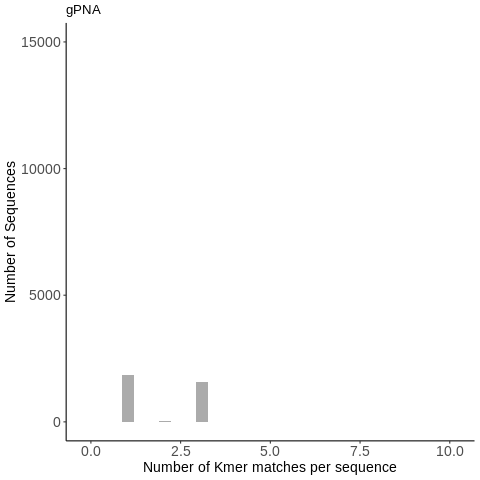

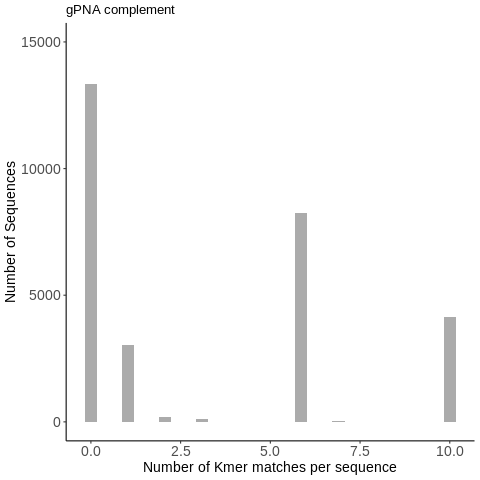

In [31]:
%%R -i df

axis_text_size = 14

gPNA<-ggplot(df, aes(x=gPNA)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA',y="Number of Sequences",x="Number of Kmer matches per sequence")+
     ylim(c(0,15000))


alternate <-ggplot(df, aes(x=alternate)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA complement',y="Number of Sequences",x="Number of Kmer matches per sequence")+
  ylim(c(0,15000))

ggsave('figures/gPNA_fungal_kmercount.png',plot=gPNA,width=6,height=6,device='png',dpi=900)

ggsave('figures/gPNAcomplement_fungal_kmercount.png',plot=alternate,width=6,height=6,device='png',dpi=900)


print(gPNA)
print(alternate)